# Sampling Distributions Dance Party! Project
Get your dancing shoes ready! You are a DJ trying to make sure you are ready for a big party. You don’t have time to go through all the songs you can work with. Instead, you want to make sure that any sample of 30 songs from your playlist will get the party started. To do this, you will use the power of sampling distributions!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Helper Functions

In [22]:
def choose_statistic(x, sample_stat_text):
    
    # Calculate mean if the text is "Mean"
    if sample_stat_text == "Mean":
        return np.mean(x)
    
    # Calculate minimum if the text is "Minimum"
    elif sample_stat_text == "Minimum":
        return np.min(x)
    
    # Calculate variance if the text is "Variance"
    elif sample_stat_text == "Variance":
        return np.var(x, ddof=1)
    
    else:
        raise Exception("Make sure to input 'Mean', 'Minimum', or 'Variance'")

In [7]:
def population_distribution(population_data):
    
    # Plot the population disribution
    sns.histplot(population_data, stat = "density")
    
    # Informative title for the distribution
    plt.title(f"Population Distribution")
    
    # Remove None label
    plt.xlabel("")
    plt.show()

In [13]:
def sampling_distribution(population_data, samp_size, stat):
    
    # List that will hold all the sample statistics
    sample_stats = []
    
    for i in range(500):
        # Get a random sample from the population of size samp_size
        samp = np.random.choice(population_data, samp_size, replace = False)
        
        # Calculate the chosen statistic (mean, minimum or variance) of the sample
        sample_stat = choose_statistic(samp, stat)
        
        # add sample_stat to the sample_stats list
        sample_stats.append(sample_stat)
    
    pop_statistic = round(choose_statistic(population_data, stat), 2)
    
    # Plot the sampling distribution
    sns.histplot(sample_stats, stat = "density")
    
    # Informative title for the sampling distribution
    plt.title(f"Sampling Distribution of the {stat} \nMean of the Sample {stat}s: {round(np.mean(sample_stats), 2)}\
    \n Population {stat}: {pop_statistic}")
    
    plt.axvline(pop_statistic, color = "g", linestyle = "dashed", label = f"Population {stat}")
    
    # Plot the mean of the chosen sample statistic for the sampling distribution
    plt.axvline(np.mean(sample_stats), color = "orange", linestyle = "dashed", label = f"Mean of the Sample {stat}s")
    
    plt.legend()
    plt.show()

## Sampling Distribution Exploration

### Task 1
Load in the spotify dataset

In [2]:
spotify_data = pd.read_csv("spotify_data.csv")

### Task 2
Preview the dataset

In [3]:
spotify_data.head()

,tempo,danceability,energy,instrumentalness,liveness,valence
0,156.985,0.831,0.814,0.013400,0.0556,0.3890
1,115.080,0.719,0.493,0.000000,0.1180,0.1240
2,218.050,0.850,0.893,0.000004,0.3720,0.0391
3,186.948,0.476,0.781,0.000000,0.1140,0.1750
4,147.988,0.798,0.624,0.000000,0.1660,0.5910


### Task 3
We are going to focus on the tempo variable. This column gives the beats per minute (bpm) of each song in spotify.csv. 

In [4]:
song_tempos = spotify_data["tempo"]

### Task 4
Plot the population distribution with the mean labeled

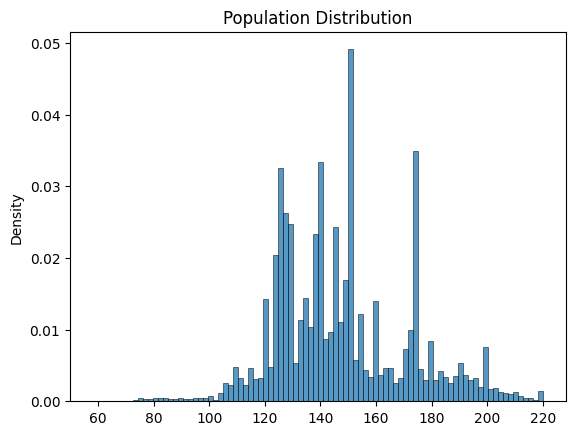

In [10]:
population_distribution(song_tempos)

**The population distribution is approximately normal with a little bit of right-skewness.**

### Task 5

Now let’s plot the sampling distribution of the sample mean with sample sizes of 30 songs. To do this, use the ``sampling_distribution()`` helper function.

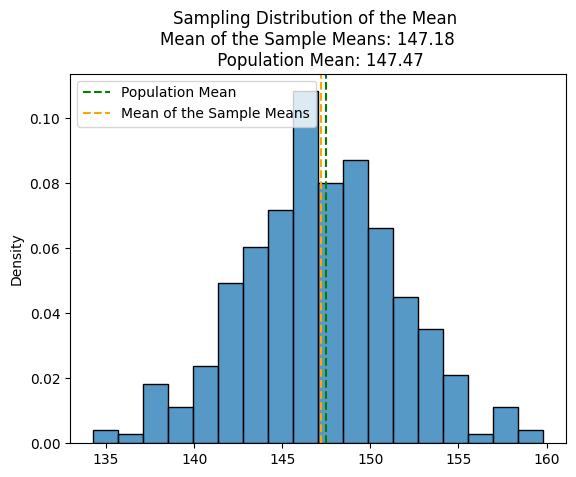

In [14]:
sampling_distribution(population_data = song_tempos, samp_size = 30, stat = "Mean")

**The mean is also an unbiased estimator as the mean of the sampling distribution of the mean is always approximately the same as the population mean.**

### Task 6

Now let’s plot the sampling distribution of the sample minimum with sample sizes of 30 songs. To do this, use the ``sampling_distribution()`` helper function.

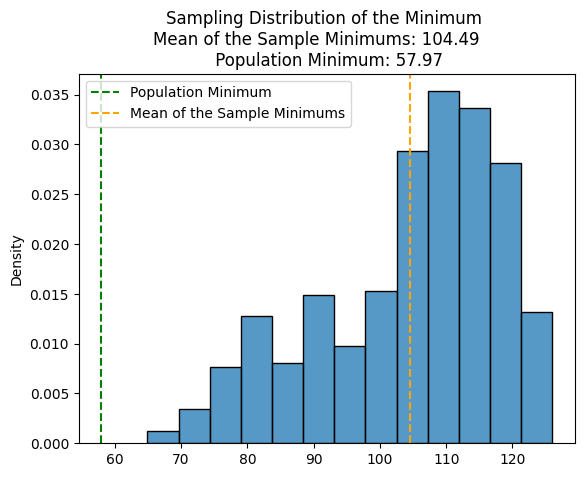

In [16]:
sampling_distribution(population_data = song_tempos, samp_size = 30, stat = "Minimum")

**Notice that the mean of the sample minimums is consistently much higher than the population minimum. Since you are looking for high-tempo songs for the party, this is actually a good thing! You will want to avoid having a lot of low-tempo songs.**

### Task 7

Now let’s plot the sampling distribution of the sample variance with sample sizes of 30 songs. To do this, use the ``sampling_distribution()`` helper function.

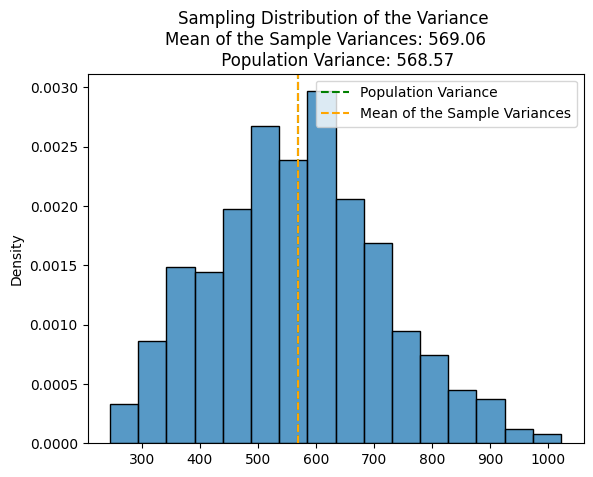

In [23]:
sampling_distribution(population_data = song_tempos, samp_size = 30, stat = "Variance")

**Sample variance becomes an unbiased estimator of the population variance**

## Calculating Probabilities

### Task 8
Calculate the population mean and standard deviation

In [33]:
population_mean = song_tempos.mean()
population_mean

147.4740559035556

In [32]:
population_std = song_tempos.std()
population_std

23.844623315372715

### Task 9
Use `population_mean` and `population_std` to calculate the standard error of the sampling distribution of the sample mean with a sample size of 30.

In [35]:
standard_error = population_std / (30 ** 0.5)
standard_error

4.353412688347752

### Task 10
You are afraid that if the average tempo of the songs you randomly select is less than **140bpm** that your party will not be enjoyable.

Using `population_mean` and `standard_error` in a CDF, calculate the probability that the sample mean of 30 selected songs is less than **140bpm**.

In [36]:
stats.norm.cdf(140, population_mean, standard_error)

0.04300540443702951

### Task 11
You know the party will be truly epic if the randomly sampled songs have an average tempo of greater than **150bpm**.

Using population_mean and ``standard_error`` in a CDF, calculate the probability that the sample mean of 30 selected songs is GREATER than **150bpm**.

In [37]:
1 - stats.norm.cdf(150, population_mean, standard_error)

0.2808825930026835

---